In [1]:
import pandas as pd

In [8]:
co=pd.read_csv('data/先进制造上市企业.csv',index_col=0)
co

,0
0,TCL中环新能源科技股份有限公司
1,TCL科技集团股份有限公司
2,七星电气股份有限公司
3,万马科技股份有限公司
4,三友联众集团股份有限公司
...,...
2779,黑龙江林海华安新材料股份有限公司
2780,黑龙江省发现者机器人股份有限公司
2781,齐峰新材料股份有限公司
2782,龙芯中科技术股份有限公司


In [12]:
co['0'].dropna().nunique()

2783

In [13]:
bridgew=pd.read_csv('data/patent_bridge.csv')

In [14]:
bridgew.shape

(9338426, 8)

In [15]:
bridgew

,Unnamed: 0,序号,公开（公告）号,申请号,申请日,申请人,标题 (中文),table
0,0,1,CN114587079A,CN202210229642.3,2022-03-09,江西晶亮实业有限公司,一种便携式可移动的靠背课椅,patent_incopat_202101_202211
1,1,2,CN114587081A,CN202210023433.3,2022-01-10,皖西学院,一种面条生产用的组合式储物柜,patent_incopat_202101_202211
2,2,3,CN114587082A,CN202210242336.3,2022-03-13,尚品本色智能家居有限公司,一种自动平衡服装数量的衣柜,patent_incopat_202101_202211
3,3,4,CN114587083A,CN202210058364.X,2022-01-19,宁波工程学院,一种可自动取放的智能鞋柜,patent_incopat_202101_202211
4,4,5,CN114587084A,CN202210133941.7,2022-02-14,江苏诺德物流设备制造有限公司,一种轻便的可移动密集架及其使用方法,patent_incopat_202101_202211
...,...,...,...,...,...,...,...,...
9338421,235,2260236,PH12021551776A1,PH12021551776,NaN,Hangzhou Dac Biotech Co Ltd,鹅膏蕈毒素与分支接头的缀合物,patent202404
9338422,236,2260237,PH12021500050A1,PH12021500050,NaN,Hangzhou Dac Biotech Co Ltd,细胞毒性剂与具有分支接头的细胞结合分子的缀合物,patent202404
9338423,237,2260238,PH12021551878A1,PH12021551878,NaN,Sansure Biotech Inc,核酸释放剂、核酸PCR扩增方法及PCR扩增试剂盒,patent202404
9338424,238,2260239,PH12021552622A1,PH12021552622,NaN,Shanghai Junshi Biosciences Co Ltd,抗PD-1抗体在制备治疗实体瘤药物中的应用,patent202404


In [16]:
co_data=bridgew['申请人'].str.split(';',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('Co')

In [20]:
co_data.isin(co['0'].dropna().unique()).sum()

805018

In [32]:
patent_stack=co_data.isin(co['0'].dropna().unique())
patent_co=bridgew.loc[patent_stack[patent_stack].index]
patent_co['Co']=co_data[patent_stack]

In [42]:
patent_co['Co'].value_counts()

Co
珠海格力电器股份有限公司        98919
中兴通讯股份有限公司          85880
美的集团股份有限公司          70569
京东方科技集团股份有限公司       48646
海尔智家股份有限公司          27862
                    ...  
上海华魏科技股份有限公司            1
北京泰诚信测控技术股份有限公司         1
四川雷克斯智慧科技股份有限公司         1
苏州海中航空科技股份有限公司          1
辽宁经纬测绘规划建设股份有限公司        1
Name: count, Length: 2497, dtype: int64

In [38]:
patent_co.table.value_counts()

table
patent202210                    485039
patent202404                    197130
patent_incopat_202101_202211    109854
patent_incopat_202212_202312     12773
patent202309                       222
Name: count, dtype: int64

In [41]:
patent_co.rename(columns={'Unnamed: 0':'index'}).to_csv('data/先进制造上市企业专利.csv')

In [ ]:
tb_id=data.groupby('table')['申请号'].apply(lambda x:x.to_list())

In [ ]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
batch_size=5000
df_filter = pd.DataFrame()
for table in tb_id.index:
    query = text(f'SELECT `公开（公告）号`,申请号,`摘要 (中文)` FROM `{table}` WHERE `申请号` in :ids')
    ids = tuple(tb_id[table])
    for batch in chunks(ids, batch_size):
        #result = db.session.execute(query, {'ids': ids})
        for i,chunk in enumerate(pd.read_sql_query(query, con=engine,chunksize=10000, params={'ids': batch})):
            df_filter = pd.concat([df_filter,chunk])
            print(i,chunk.shape[0],len(batch))
            del chunk
    print(table,df_filter.shape[0])

In [ ]:
data=pd.merge(data,df_filter,on=['公开（公告）号','申请号'],how='left')
data=data.sort_values('申请日',ascending=False).drop_duplicates(['公开（公告）号','申请号','Co'],keep='first')

In [43]:
patent_co=pd.read_csv('data\先进制造上市企业专利.csv',index_col=0)
patent_co.shape

(805017, 10)

In [44]:
patent_co.head()

,index,序号,公开（公告）号,申请号,申请日,申请人,标题 (中文),table,Co,摘要 (中文)
951897,111,2260112,CN117811516A,CN202410235904.6,2024-03-01,成都鹰谷米特科技有限公司; 重庆鹰谷光电股份有限公司,可变跨阻TIA放大器集成电路及激光脉冲探测器,patent202404,重庆鹰谷光电股份有限公司,本发明提供一种可变跨阻TIA放大器集成电路及激光脉冲探测器，属于激光测距应用技术领域。该集成...
951896,110,2260111,CN117807937A,CN202410236395.9,2024-03-01,成都鹰谷米特科技有限公司; 重庆鹰谷光电股份有限公司,脉冲光电探测前置放大电路数模混合集成电路芯片及设备,patent202404,重庆鹰谷光电股份有限公司,本申请提供一种脉冲光电探测前置放大电路数模混合集成电路芯片及设备，涉及激光空间定位应用的光电...
951895,74,2260075,CN117798129A,CN202410229864.4,2024-02-29,安泰爱科科技有限公司; 安泰科技股份有限公司,钕铁硼通过式超声波清洗机输送系统,patent202404,安泰科技股份有限公司,本发明公开了钕铁硼通过式超声波清洗机输送系统，属于输送设备技术领域。所述工作台顶部连接有两个...
951894,42,2260043,CN117775078A,CN202410216849.6,2024-02-28,山西阳光三极科技股份有限公司,一种基于深度学习的矿内货运列车行驶方向判断方法,patent202404,山西阳光三极科技股份有限公司,本发明涉及列车驾驶技术领域，尤其涉及一种基于深度学习的矿内货运列车行驶方向判断方法，该方法包...
951893,36,2260037,CN117805988A,CN202410222682.4,2024-02-28,中兴通讯股份有限公司,分纤箱及其连接件,patent202404,中兴通讯股份有限公司,本公开提供了一种分纤箱及其连接件，涉及通信FTTH和通信FTTR技术领域，用于将微管固定于通...


In [46]:
from w2v_lda import *
Stopwords=set(read2list('data\\专利停用词表2024.txt'))

In [47]:
jieba.initialize()
jieba.load_userdict('data\\专利分词词库.txt') 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Prime\AppData\Local\Temp\jieba.cache
Loading model cost 0.758 seconds.
Prefix dict has been built successfully.


In [53]:
del patent_co['index']
del patent_co['序号']

In [73]:
patent_co['序号']=patent_co['公开（公告）号']
patent_co.reset_index(drop=True,inplace=True)

In [57]:
wd_data=pd.read_parquet('data\patent_cut_doc_先进制造上市.parquet')
wd_data['词语']=wd_data['词语'].dropna().apply(lambda x: x.tolist())

In [82]:
wd_data.index,patent_co.index

(RangeIndex(start=0, stop=805017, step=1),
 RangeIndex(start=0, stop=805017, step=1))

In [83]:
import w2v_lda
import importlib
importlib.reload(w2v_lda)
from w2v_lda import *

In [84]:
%%time
model=W2vLda(sentences=wd_data['词语'],patent_data=patent_co,co_data=patent_co['Co'],
     suffix='先进制造上市',stop_words=Stopwords,
     vector_size=250,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=50,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)

CPU times: total: 969 ms
Wall time: 955 ms


In [112]:
model.id_data

0         CN117811516A
1         CN117807937A
2         CN117798129A
3         CN117775078A
4         CN117805988A
              ...     
805007      CN2248433Y
805012      CN3044990D
805014      CN2201504Y
805015      CN2202815Y
805016      CN1118043A
Name: 序号, Length: 802542, dtype: object

In [86]:
%%time
res=model.on_corpus()
print(res)
model.save()

topics_vec,documents_vec=model.on_topics()
np.save(f"data\\topics_vec_{model.suffix}.npy",np.array(topics_vec))

df_topic=model.df_topics(topn=30)
df_topic.to_excel(f'data\\patent_topic_words_{model.suffix}.xlsx')

df_lda_w2v=model.docs_vec(documents_vec,patent_co)

{'vector_size': 250, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 50, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
(140786, 109630, 109630)
CPU times: total: 2h 11min 47s
Wall time: 55min 45s


In [147]:
topics_words=model.topics_words(topn=30)
topics_words.value_counts()[:20]

word
系统    9
设有    8
相连    6
位于    6
产生    6
步骤    6
结构    5
接收    4
操作    4
表面    4
选择    4
方向    4
工作    4
性能    4
生产    4
功能    4
位置    4
效率    3
温度    3
进入    3
Name: count, dtype: int64

In [87]:
df_topic

,word,0,word,1,word,2,word,3,word,4,...,word,45,word,46,word,47,word,48,word,49
0,金属,0.088295,监控,0.114186,密钥,0.149291,电路,0.150591,多媒体,0.125667,...,测试,0.207109,材料,0.047428,电池,0.129936,标识,0.139442,空调器,0.039651
1,导电,0.052637,告警,0.096860,传感器,0.098612,开关,0.053298,中心,0.108196,...,天线,0.145320,混合,0.031191,循环,0.053891,干扰,0.056297,风机,0.031065
2,器件,0.040499,高速,0.057066,元件,0.069917,电压,0.053250,电机,0.082754,...,模拟,0.046852,制备,0.019703,护套,0.042407,符号,0.045725,出风口,0.030968
3,家庭,0.039948,发射,0.050197,压缩,0.057438,电源,0.049609,散热,0.060629,...,通话,0.044878,搅拌,0.017092,二次,0.029192,过滤,0.038762,粉碎,0.026863
4,介质,0.028445,主机,0.043609,pcb,0.047180,电流,0.035360,转子,0.025524,...,电视机,0.043127,步骤,0.016375,容量,0.026758,压力,0.038126,风道,0.026834
5,结构,0.018930,宽带,0.039752,感应,0.044356,输出,0.031476,发热,0.017532,...,预定,0.042917,合金,0.015480,加强,0.026410,基带,0.037960,空气,0.026553
6,隔离,0.018343,液晶,0.039106,继电器,0.034549,驱动,0.027093,多点,0.017010,...,系统,0.028663,加入,0.013536,性能,0.024872,协商,0.034895,机头,0.022614
7,线路板,0.017461,电路板,0.037931,控制点,0.028511,控制,0.025060,过载,0.016288,...,测试方法,0.022732,反应,0.010259,正极,0.023810,onu,0.026706,隔板,0.017597
8,接入点,0.016582,激活,0.037775,光电,0.022965,以太网,0.021271,绕组,0.015728,...,触摸屏,0.019152,性能,0.010051,负极,0.021556,正交,0.024670,进风口,0.017306
9,绝缘层,0.015941,接收端,0.035387,计时,0.017495,控制电路,0.017518,导热,0.015434,...,应用程序,0.017722,含量,0.009974,基体,0.020730,接收机,0.023526,壳体,0.017298


In [133]:
df_topic_1=pd.read_excel(f'data\\patent_topic_words_先进制造.xlsx',index_col=0)
df_topic_1

,word,0,word.1,1,word.2,2,word.3,3,word.4,4,...,word.45,45,word.46,46,word.47,47,word.48,48,word.49,49
0,控制,0.336473,壳体,0.060365,时间,0.137966,检测,0.434082,工件,0.171947,...,组件,0.104818,电机,0.166002,监测,0.180670,信号,0.229929,设备,0.691298
1,温度,0.093791,本体,0.052032,同步,0.073825,晶圆,0.070577,基底,0.107282,...,安装,0.066537,控制器,0.097613,场景,0.119917,功率,0.044660,对象,0.043946
2,模式,0.050696,结构,0.036464,时钟,0.069153,缺陷,0.039418,通讯,0.096650,...,机构,0.060612,物料,0.064860,开启,0.060530,输出,0.037771,极耳,0.026328
3,工作,0.031869,限位,0.035447,缓冲,0.056486,阈值,0.038228,神经网络,0.063235,...,固定,0.046357,转子,0.036421,关闭,0.053182,采样,0.032491,识别方法,0.013465
4,运行,0.027646,夹持,0.028398,翻转,0.047002,异常,0.034680,吸盘,0.052574,...,驱动,0.030306,轴承,0.034787,打开,0.051750,频率,0.026628,反射镜,0.011968
5,控制系统,0.022630,绝缘,0.024258,周期,0.040176,探针,0.021048,沟道,0.048676,...,支撑,0.025624,端盖,0.031197,跟踪,0.044414,输入,0.025969,铜箔,0.010763
6,启动,0.021287,导电,0.023150,锁定,0.033064,等于,0.017985,手机,0.033976,...,设有,0.021159,定子,0.029342,转运,0.034784,校准,0.020390,配置文件,0.006139
7,感应,0.016353,开口,0.020701,时序,0.032248,大于,0.017380,损失,0.030307,...,转动,0.020907,镀膜,0.020289,协同,0.031341,脉冲,0.015925,控制设备,0.006105
8,动作,0.014671,接触,0.019989,基准,0.027335,判断,0.017249,焊缝,0.029415,...,结构,0.017539,轴向,0.020029,绕线,0.021557,放大,0.015886,电动汽车,0.005813
9,转速,0.011540,通孔,0.019889,寄存器,0.026697,释放,0.012530,周围,0.027187,...,支架,0.015712,动力,0.016158,货物,0.020258,误差,0.015722,知识,0.005302


In [145]:
topics_words_1=df_topic_1.iloc[:,::2].values.reshape(-1)
topics_words_1

array(['控制', '壳体', '时间', ..., '关机', '转换', '前端'], dtype=object)

In [149]:
topics_words.values

array(['金属', '导电', '器件', ..., '电控', '滚子', '新风'], dtype=object)

In [154]:
len(set(topics_words)),len(set(topics_words_1))

(1313, 1338)

In [155]:
len(set(topics_words)&set(topics_words_1))

762

In [156]:
762/1313

0.5803503427265804

In [91]:
len(df_lda_w2v),len(model.sentences)

(802542, 802542)

In [93]:
patent_co['申请年']=pd.to_datetime(patent_co.申请日).dt.year
patent_co['申请年'].value_counts()

申请年
2021    105041
2020     95378
2019     86849
2018     78291
2022     70368
2017     66350
2016     59096
2015     45041
2023     37724
2014     31512
2013     24121
2012     23042
2011     18437
2010     15840
2009     13788
2008     10500
2007     10174
2006      5398
2005      2989
2004      1894
2003      1439
2002       592
2001       399
2024       373
2000       185
1999       142
1997        19
1998        15
1996         9
1995         7
1994         4
Name: count, dtype: int64

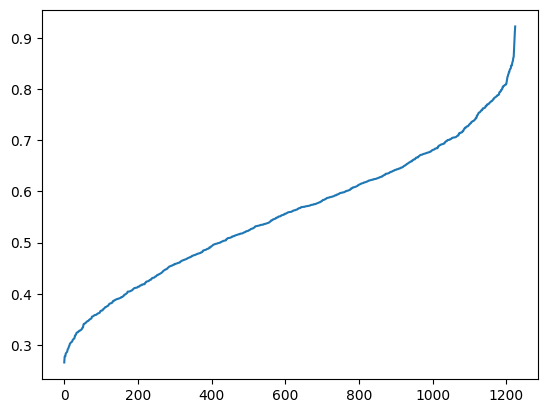

In [114]:
import matplotlib.pyplot as plt
plt.plot(np.sort(cosine_sim_arr(np.array(topics_vec))))

In [95]:
for i  in range(2000,2025):
    group_ids_t=patent_co[patent_co['申请年']<=i].groupby('Co')['序号'].apply(lambda x: x.to_list()).reset_index()
    co_ids_vec=model.group_vec(df_lda_w2v,group_ids_t)
    # co_ids_vec =group_ids_t['序号'].apply(lambda x: df_lda_w2v.loc[df_lda_w2v.index.isin(x)].mean(axis=0))
    # co_ids_vec.index = group_ids_t['Co']
    # co_ids_vec=co_ids_vec[co_ids_vec.sum(axis=1) != 0]  
    print(i,len(group_ids_t),len(co_ids_vec), cosine_sim_arr(co_ids_vec).mean())
    co_ids_vec.to_parquet(f'data\patent_co_vec_{model.suffix}_{i}.parquet')

co_ids_vec.shape

2000 17 17 0.8221987664100254
2001 30 30 0.8299951421442167
2002 42 42 0.834147388890356
2003 53 53 0.8398950392813077
2004 65 65 0.8435748945519989
2005 80 80 0.8405470114173441
2006 108 108 0.8235276540194817
2007 158 158 0.8259978964804031
2008 222 220 0.8290727397864613
2009 297 295 0.8344254771223177
2010 381 380 0.8369387656662225
2011 495 494 0.8355056767518776
2012 618 617 0.832059548623851
2013 775 774 0.8288785144426961
2014 953 952 0.8273081344221904
2015 1218 1218 0.8283968624652738
2016 1518 1518 0.8382623405763437
2017 1700 1700 0.8500114086347962
2018 1818 1818 0.8558593739115072
2019 1881 1881 0.8615641485504687
2020 1918 1918 0.8677199878658074
2021 2416 2416 0.8624084511638606
2022 2477 2477 0.865993639935187
2023 2496 2496 0.8679683805961972
2024 2497 2497 0.8679465512817406


(2497, 250)

In [96]:
co_ids_vec_1=pd.read_parquet(f'data\patent_co_vec_先进制造_{2024}.parquet')
co_ids_vec_1.shape

(7370, 250)

In [97]:
co_closeness=pd.DataFrame(cosine_similarity(co_ids_vec.values, co_ids_vec_1.values),index=co_ids_vec.index,columns=co_ids_vec_1.index)
co_closeness

Co,Dexta Robotics,TCL华星光电技术有限公司,TCL科技集团股份有限公司,一道新能源科技股份有限公司,七星电气股份有限公司,七腾机器人有限公司,万华新材料有限公司,万向一二三股份公司,万马科技股份有限公司,万鼎硅钢集团有限公司,...,黄山富田精工智造股份有限公司,黄山市光锐通信股份有限公司,黄石晨信光电股份有限公司,黑龙江哈工石墨科技有限公司,黑龙江林海华安新材料股份有限公司,黑龙江省发现者机器人股份有限公司,鼎桥通信技术有限公司,龙微科技无锡有限公司,龙腾半导体股份有限公司,龙芯中科技术股份有限公司
Co,,,,,,,,,,,,,,,,,,,,,
TCL科技集团股份有限公司,0.101352,0.183743,0.187115,0.167672,0.151452,0.165159,0.164751,0.166153,0.152028,0.149920,...,0.164265,0.136719,0.151843,0.168844,0.151709,0.156345,0.124436,0.169091,0.164474,0.152602
七星电气股份有限公司,0.145924,0.212115,0.213973,0.198027,0.188330,0.207529,0.196576,0.192629,0.196441,0.178987,...,0.200996,0.168868,0.185104,0.186246,0.193125,0.183461,0.157398,0.204100,0.205492,0.187596
万马科技股份有限公司,0.143666,0.215575,0.217199,0.202706,0.191830,0.208694,0.200936,0.195295,0.198532,0.182580,...,0.204083,0.173046,0.188724,0.191380,0.192145,0.190970,0.161512,0.209371,0.204664,0.186610
三友联众集团股份有限公司,0.158172,0.225281,0.229853,0.211153,0.198293,0.221263,0.205492,0.206018,0.205800,0.189298,...,0.211158,0.180658,0.195321,0.201679,0.202428,0.195550,0.170752,0.215308,0.218099,0.205700
三安光电股份有限公司,0.131685,0.176124,0.173664,0.147781,0.130663,0.161341,0.138768,0.147692,0.142322,0.124489,...,0.143585,0.119756,0.129168,0.153386,0.130319,0.138377,0.125539,0.151075,0.159444,0.177760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黄山市光锐通信股份有限公司,0.131295,0.203861,0.202314,0.186585,0.176234,0.193787,0.185304,0.182443,0.182900,0.169400,...,0.189122,0.158092,0.174916,0.174984,0.182894,0.171089,0.142495,0.191537,0.193313,0.172513
黄石晨信光电股份有限公司,0.131112,0.202577,0.205287,0.189444,0.180206,0.197143,0.186974,0.185011,0.185102,0.173617,...,0.191336,0.161352,0.178670,0.179173,0.181553,0.175540,0.149407,0.192850,0.195167,0.178200
黑龙江林海华安新材料股份有限公司,0.168808,0.222760,0.220509,0.207578,0.198249,0.217052,0.202030,0.195021,0.201842,0.185596,...,0.203617,0.187673,0.191261,0.191156,0.187155,0.199234,0.172813,0.214499,0.212054,0.207650


In [123]:
co_closeness.values.mean(),co_closeness.values.min(),co_closeness.values.max()

(0.18455702574218252, 0.02444332432288031, 0.30754764943618573)

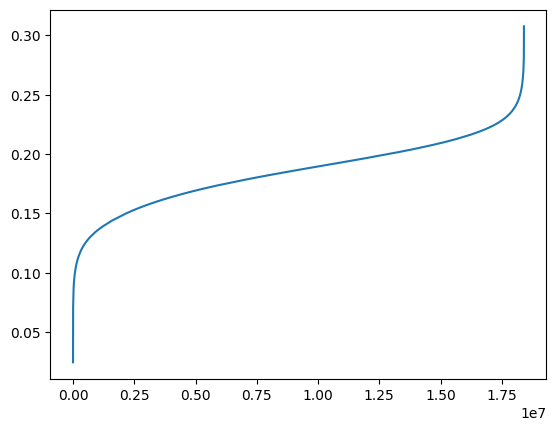

In [116]:
plt.plot(np.sort(co_closeness.values.reshape(-1)))

In [102]:
tmp=list(set(co_ids_vec.index)&set(co_ids_vec_1.index))
len(tmp)

2497

In [129]:
tmp[0],co_closeness.loc[tmp[0],tmp[0]]

('杭州指安科技股份有限公司', 0.2107123816664045)

In [130]:
tmp[10],co_closeness.loc[tmp[10],tmp[10]]

('南京北路智控科技股份有限公司', 0.18176352138060275)

In [121]:
co_multi=co_ids_vec.values @ co_ids_vec_1.values.T
co_multi

array([[0.44864363, 0.73196077, 0.73273069, ..., 0.64008304, 0.65937582,
        0.64821558],
       [0.59786466, 0.7820891 , 0.77553697, ..., 0.71510029, 0.76249921,
        0.73754983],
       [0.61107858, 0.82518448, 0.8172767 , ..., 0.76156889, 0.78841143,
        0.76167545],
       ...,
       [0.68304258, 0.81114855, 0.78931089, ..., 0.74221039, 0.77708526,
        0.80626545],
       [0.61781711, 0.82616777, 0.82815926, ..., 0.78647982, 0.81543869,
        0.7406053 ],
       [0.3375091 , 0.71042859, 0.71859018, ..., 0.64949768, 0.63020572,
        0.58999031]])

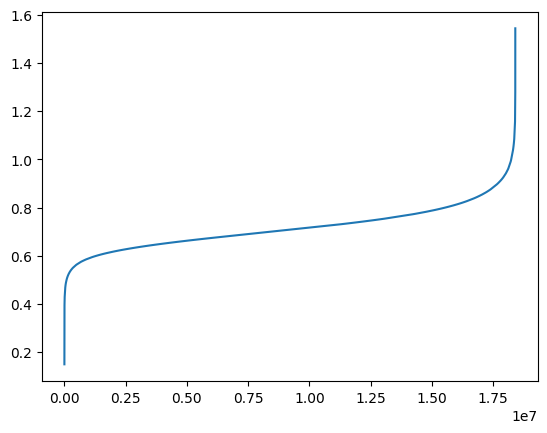

In [122]:
plt.plot(np.sort(co_multi.reshape(-1)))

In [157]:
tmp=list(set(co_ids_vec.index)|set(co_ids_vec_1.index))
len(tmp)

7370

In [159]:
import pickle
with open('data\先进制造企业名称.pkl', 'wb') as file:
    pickle.dump(tmp, file)